<ipython-input-1-e15640372999>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  station_id: group.set_index('Date').resample('M').mean()
<ipython-input-1-e15640372999>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  station_data[station_id] = station_df.fillna(method='ffill').fillna(method='bfill')


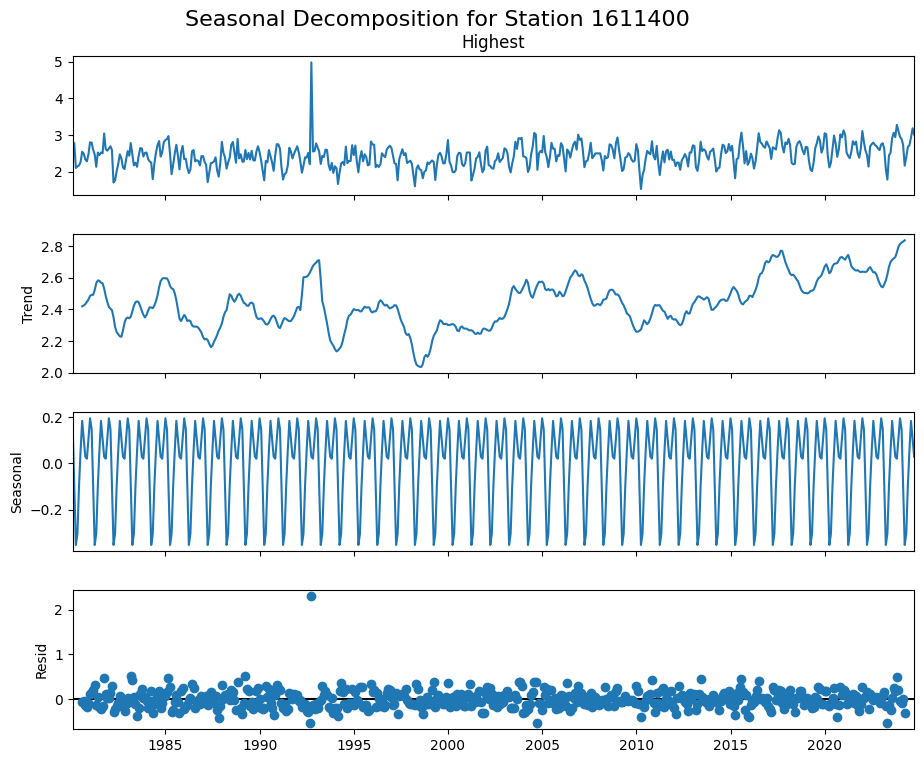

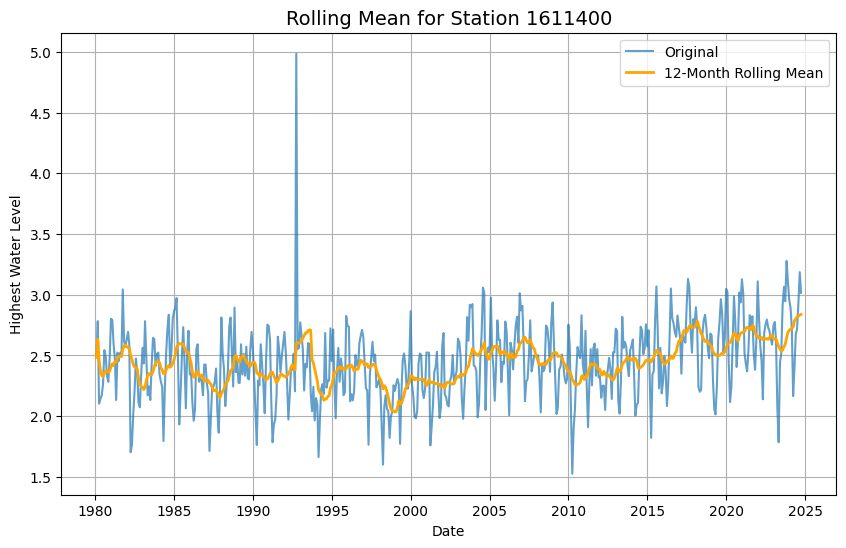

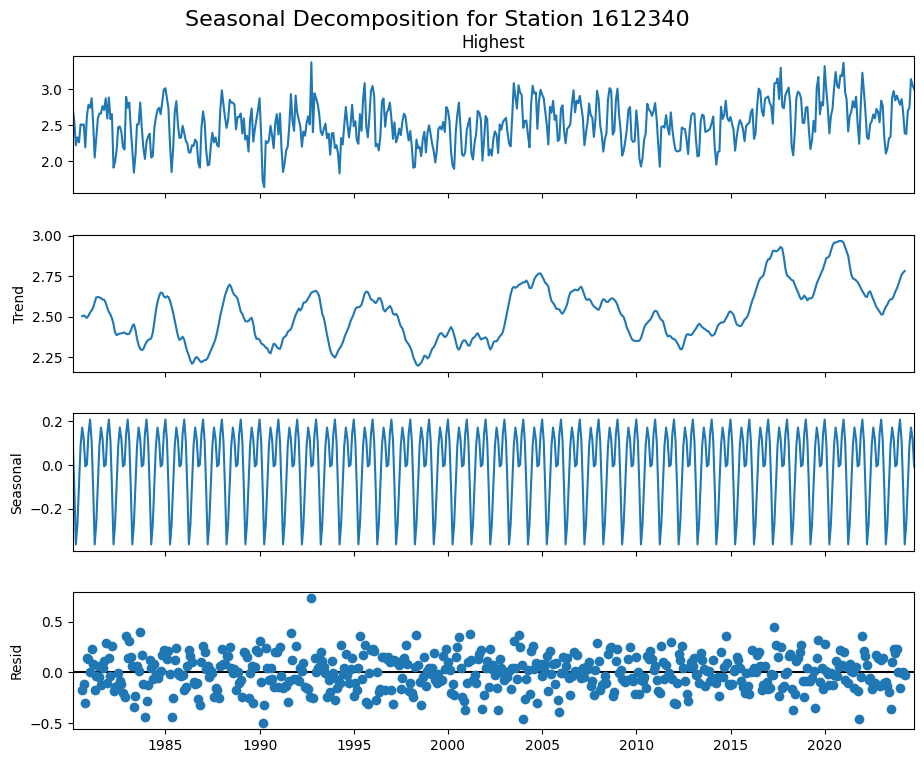

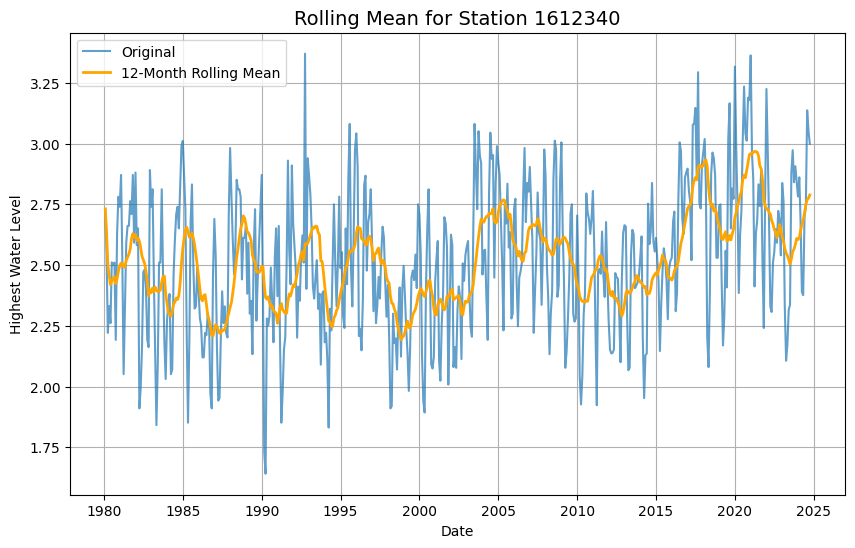

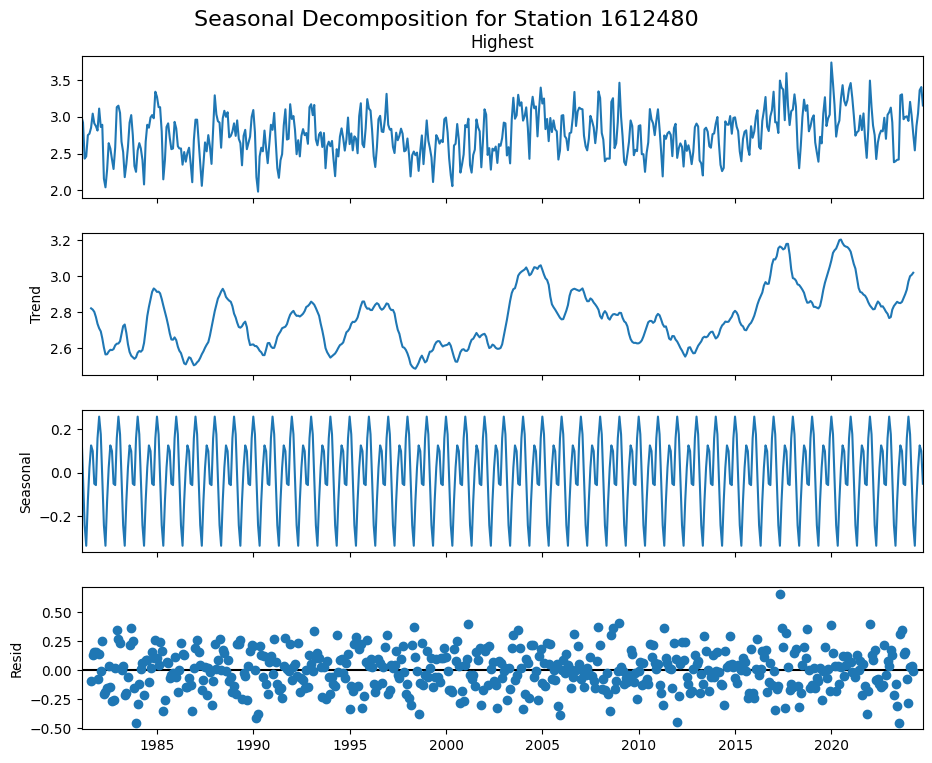

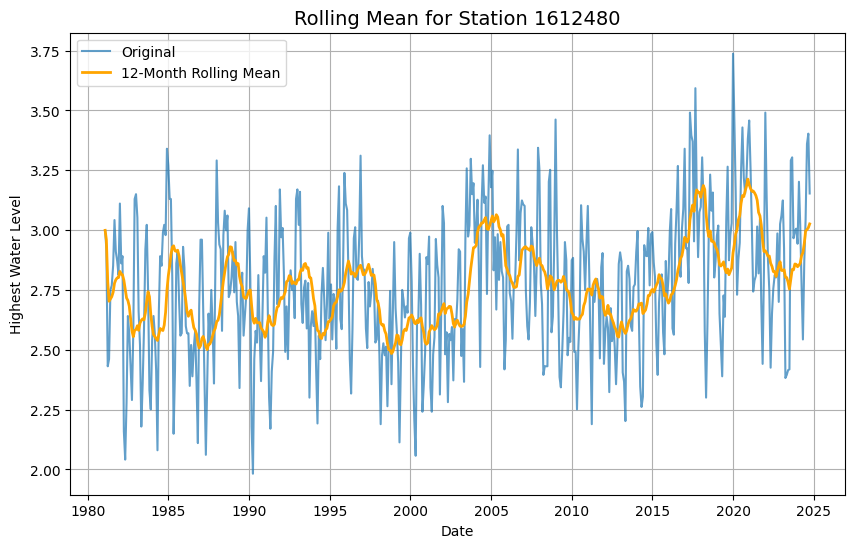

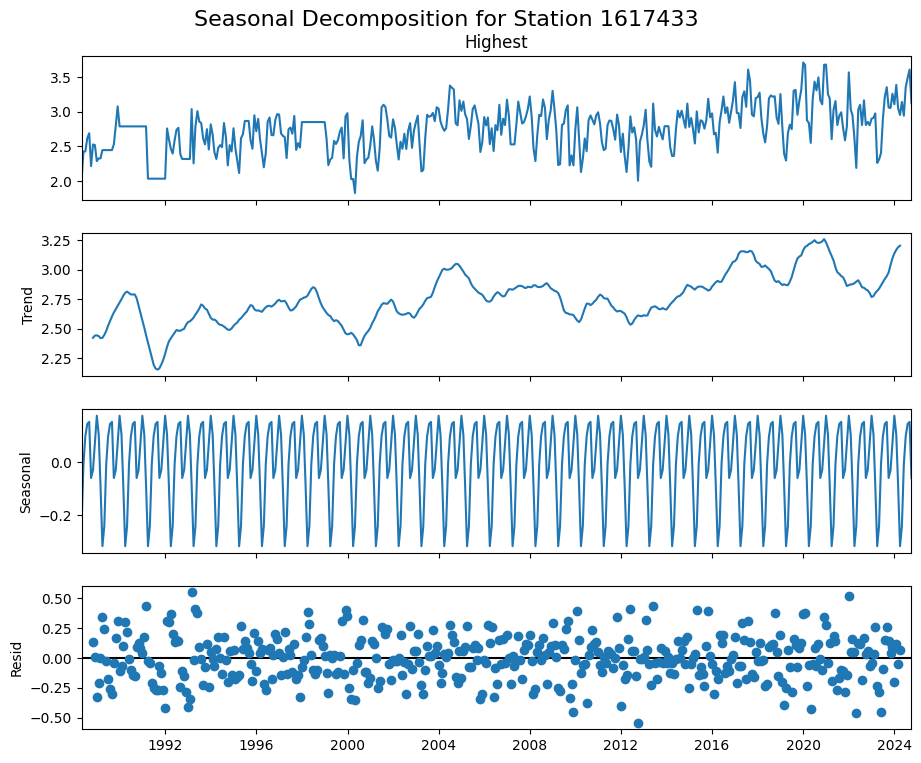

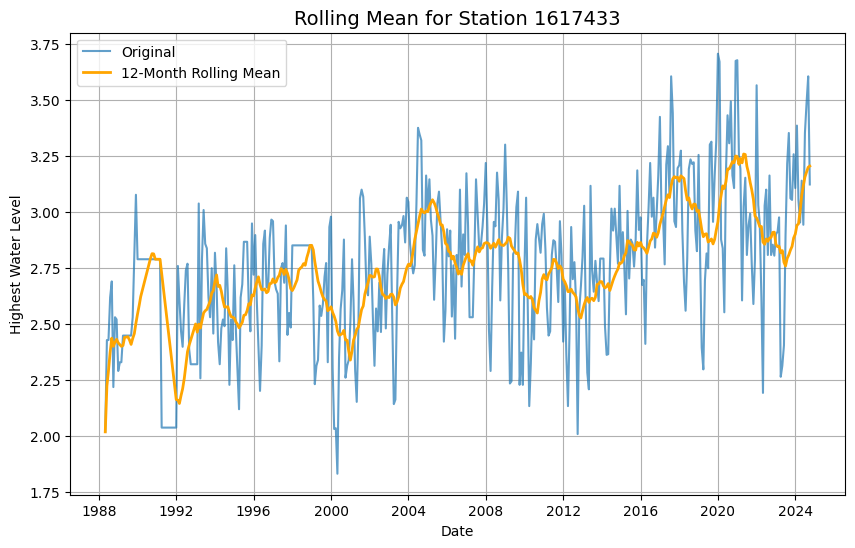

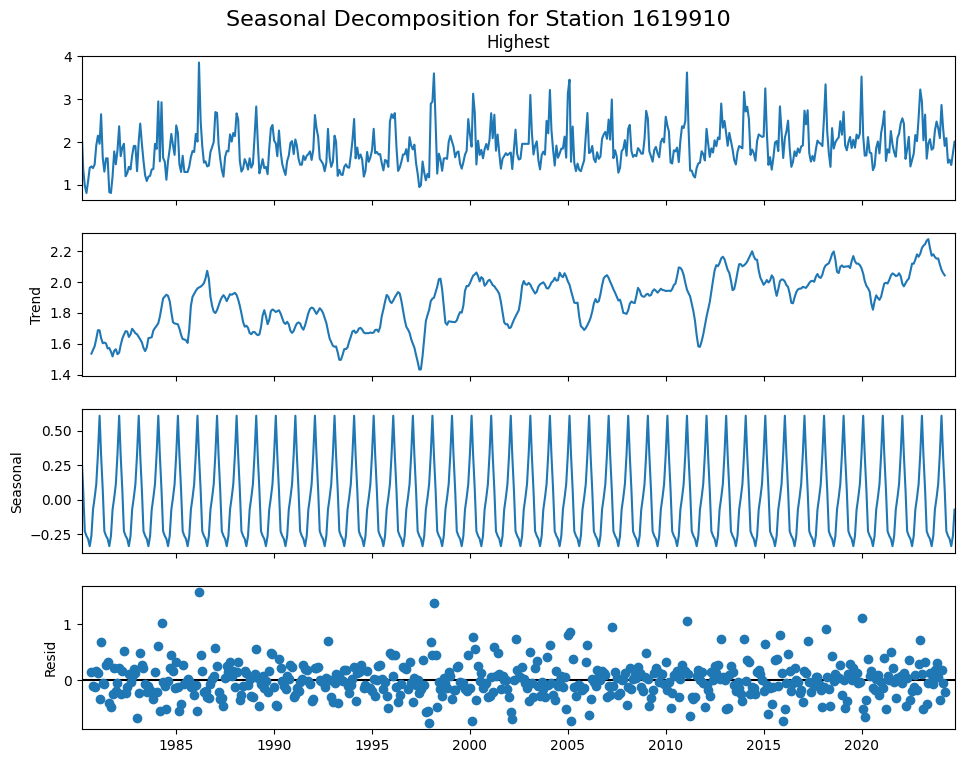

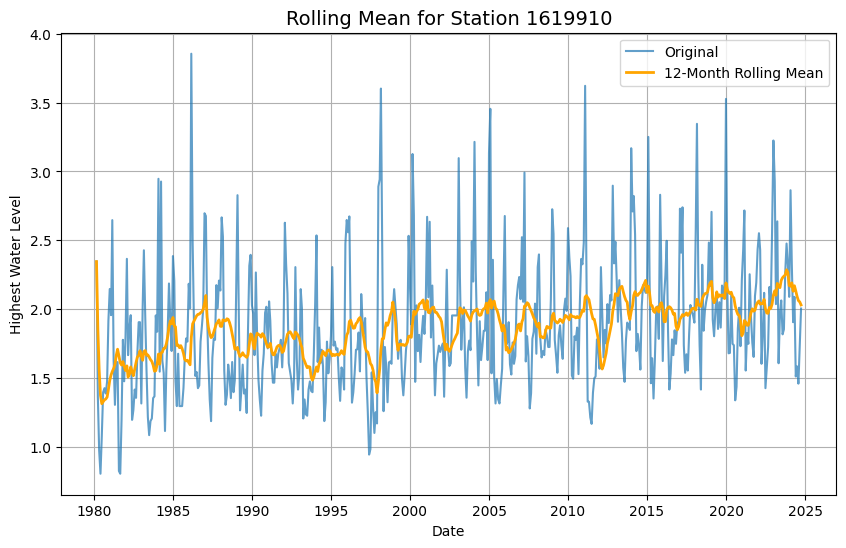

In [ ]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your dataset (replace with your file path)
file_path = 'combined_data_5_stations.csv'
data = pd.read_csv(file_path)

# Convert 'Date' to datetime and sort data
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

# Remove unnecessary columns (Time, Inf)
data = data.drop(columns=['Time (GMT)', 'Inf'], errors='ignore')

# Group by station and resample data for time-series analysis
station_groups = data.groupby('station_id')
station_data = {
    station_id: group.set_index('Date').resample('M').mean()
    for station_id, group in station_groups
}

# Handle missing values (forward fill, then backward fill)
for station_id, station_df in station_data.items():
    station_data[station_id] = station_df.fillna(method='ffill').fillna(method='bfill')

# Initialize storage for results
decomposition_results = {}
rolling_results = {}

# Perform Seasonal Decomposition and Rolling Statistics
for station_id, station_df in station_data.items():
    # Seasonal Decomposition
    decomposition = sm.tsa.seasonal_decompose(station_df['Highest'], model='additive', period=12)
    decomposition_results[station_id] = decomposition

    # Rolling Statistics
    rolling_mean = station_df['Highest'].rolling(window=12, min_periods=1).mean()
    rolling_results[station_id] = rolling_mean

    # Visualization for Seasonal Decomposition
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    plt.suptitle(f'Seasonal Decomposition for Station {station_id}', fontsize=16)
    plt.show()

    # Visualization for Rolling Statistics
    plt.figure(figsize=(10, 6))
    plt.plot(station_df['Highest'], label='Original', alpha=0.7)
    plt.plot(rolling_mean, label='12-Month Rolling Mean', color='orange', linewidth=2)
    plt.title(f'Rolling Mean for Station {station_id}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Highest Water Level')
    plt.legend()
    plt.grid()
    plt.show()